In [2]:
import pandas as pd
data = pd.read_csv("pima-indians-diabetes.data.csv", header = None)
data.head()

,0,1,2,3,4,5,6,7,8
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
X = data.iloc[:, :-1]
y = data.iloc[:, 8]
X.shape, y.shape

((768, 8), (768,))

In [4]:
from neuroboa.nn import NN
from neuroboa.layers import Dense, Activation
from neuroboa.optims import Adam, SGD, Adagrad
from neuroboa.functions import ReLU, Sigmoid, Swish, Softmax, Tanh
from neuroboa.losses import BinaryCrossEntropy, MSE
from neuroboa.constants import TQDM_NOTEBOOK, TQDM_TERMINAL

In [5]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
one_hot = OneHotEncoder()
fit = one_hot.fit(y.values.reshape(-1, 1))
labels = fit.transform(y.values.reshape(-1, 1))
labels.toarray()

scaler = StandardScaler()
X = scaler.fit_transform(X)
X

array([[ 0.63994726,  0.84832379,  0.14964075, ...,  0.20401277,
         0.46849198,  1.4259954 ],
       [-0.84488505, -1.12339636, -0.16054575, ..., -0.68442195,
        -0.36506078, -0.19067191],
       [ 1.23388019,  1.94372388, -0.26394125, ..., -1.10325546,
         0.60439732, -0.10558415],
       ...,
       [ 0.3429808 ,  0.00330087,  0.14964075, ..., -0.73518964,
        -0.68519336, -0.27575966],
       [-0.84488505,  0.1597866 , -0.47073225, ..., -0.24020459,
        -0.37110101,  1.17073215],
       [-0.84488505, -0.8730192 ,  0.04624525, ..., -0.20212881,
        -0.47378505, -0.87137393]])

In [6]:
from sklearn.model_selection import train_test_split

X_tr, X_t, y_tr, y_t = train_test_split(X, labels.toarray(), test_size = 0.33, random_state = 42)

In [7]:
y_tr.shape

(514, 2)

In [12]:
nn = NN([
    Dense(1000, input_shape = (8, )),
    Activation(ReLU()),
    Dense(100),
    Activation(Tanh()),
    Dense(500),
    Activation(ReLU()),
    Dense(2),
    Activation(Sigmoid())
])

nn.fit(X_tr, y_tr, epochs = 150, batch_size = 10, optimizer = Adam(), loss = BinaryCrossEntropy(), show_progress = TQDM_TERMINAL)

Epoch: 150: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████| 150/150 [00:03<00:00, 48.95it/s]


Plot: True


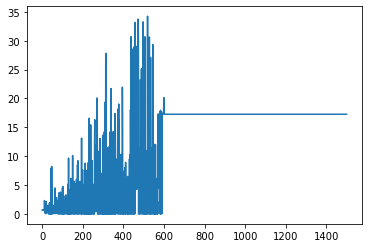

In [16]:
import matplotlib.pyplot as plt
import numpy as np
loss_list = nn.get_loss_list()
plt.plot(range(len(loss_list)), loss_list)

In [9]:
from keras.models import Sequential
from keras import layers
from keras.metrics import binary_accuracy

model = Sequential([
    layers.Dense(1000, activation = "relu"),
    layers.Dense(100, activation = "tanh"),
    layers.Dense(500, activation = "relu"),
    layers.Dense(2, activation = "sigmoid")
])

model.compile(loss='binary_crossentropy', optimizer='adagrad', metrics=[binary_accuracy])
history = model.fit(X_tr, y_tr, epochs=150, batch_size=10, verbose=2)

Using TensorFlow backend.


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Epoch 1/150
 - 1s - loss: 0.5429 - binary_accuracy: 0.7325
Epoch 2/150
 - 0s - loss: 0.4486 - binary_accuracy: 0.7753
Epoch 3/150
 - 0s - loss: 0.4336 - binary_accuracy: 0.7899
Epoch 4/150
 - 0s - loss: 0.4172 - binary_accuracy: 0.7986
Epoch 5/150
 - 0s - loss: 0.4087 - binary_accuracy: 0.7986
Epoch 6/150
 - 0s - loss: 0.4033 - binary_accuracy: 0.8132
Epoch 7/150
 - 0s - loss: 0.3962 - binary_accuracy: 0.8113
Epoch 8/150
 - 0s - loss: 0.3859 - binary_accuracy: 0.8093
Epoch 9/150
 - 0s - loss: 0.3844 - binary_accuracy: 0.8123
Epoch 10/150
 - 0s - loss: 0.3694 - binary_accuracy: 0.8142
Epoch 11/150
 - 0s - loss: 0.3681 - binary_accuracy: 0.8181
Epoch 12/150
 - 0s - loss: 0.3582 - binary_accuracy: 0.8220
Epoch 13/150
 - 0s - loss: 0.3579 - binary_accuracy: 0.8327
Epoch 14/150
 - 0s - loss: 0.3441 - binary_accuracy: 0.8346
Epoch 15/150
 - 0s - loss: 0.3461 - binary_accuracy: 0.8385
Epoch 16/150
 

Epoch 129/150
 - 0s - loss: 0.0051 - binary_accuracy: 1.0000
Epoch 130/150
 - 0s - loss: 0.0053 - binary_accuracy: 1.0000
Epoch 131/150
 - 0s - loss: 0.0054 - binary_accuracy: 1.0000
Epoch 132/150
 - 0s - loss: 0.0049 - binary_accuracy: 1.0000
Epoch 133/150
 - 0s - loss: 0.0049 - binary_accuracy: 1.0000
Epoch 134/150
 - 0s - loss: 0.0046 - binary_accuracy: 1.0000
Epoch 135/150
 - 0s - loss: 0.0049 - binary_accuracy: 1.0000
Epoch 136/150
 - 0s - loss: 0.0045 - binary_accuracy: 1.0000
Epoch 137/150
 - 0s - loss: 0.0046 - binary_accuracy: 1.0000
Epoch 138/150
 - 0s - loss: 0.0043 - binary_accuracy: 1.0000
Epoch 139/150
 - 0s - loss: 0.0044 - binary_accuracy: 1.0000
Epoch 140/150
 - 0s - loss: 0.0041 - binary_accuracy: 1.0000
Epoch 141/150
 - 0s - loss: 0.0041 - binary_accuracy: 1.0000
Epoch 142/150
 - 0s - loss: 0.0041 - binary_accuracy: 1.0000
Epoch 143/150
 - 0s - loss: 0.0041 - binary_accuracy: 1.0000
Epoch 144/150
 - 0s - loss: 0.0038 - binary_accuracy: 1.0000
Epoch 145/150
 - 0s - lo

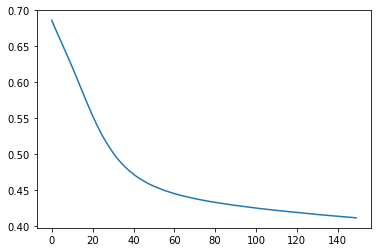

In [18]:
plt.plot(history.history["loss"])

In [19]:
import numpy as np
from keras.metrics import binary_crossentropy

y_true = [[0, 1, 0], [0, 0, 1]]
y_pred = [[0.05, 0.95, 0], [0.1, 0.8, 0.1]]

print(binary_crossentropy(y_true, y_pred).numpy())
print(BinaryCrossEntropy().loss(np.array(y_true), np.array(y_pred)))

[0.03419546 1.3391274 ]
[0.03419553 1.33912784]


In [10]:
from sklearn.metrics import log_loss, accuracy_score


In [13]:
import numpy as np
outputs = np.round(nn.predict(X_t))
keras_outputs = np.round(model.predict(X_t))
accuracy_score(outputs, y_t), accuracy_score(keras_outputs, y_t)

(0.7598425196850394, 0.7007874015748031)